In [1]:
# NN
#Build a simple neural network - model 1
# y= x**2
#Neural network with 1 layer
#Regression problem 

import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model 
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True' # to prevent kernel from being dead 
plt.style.use('ggplot')

import matplotlib
matplotlib.rcParams['figure.dpi']=200 # highres display
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams.update({'font.size': 22})

import imageio #Python library that provides easy interface to read & write images in various formats
my_images = [] #empty list name. This list is to store image data.
tf.random.set_seed(42)

(55,) (55,)


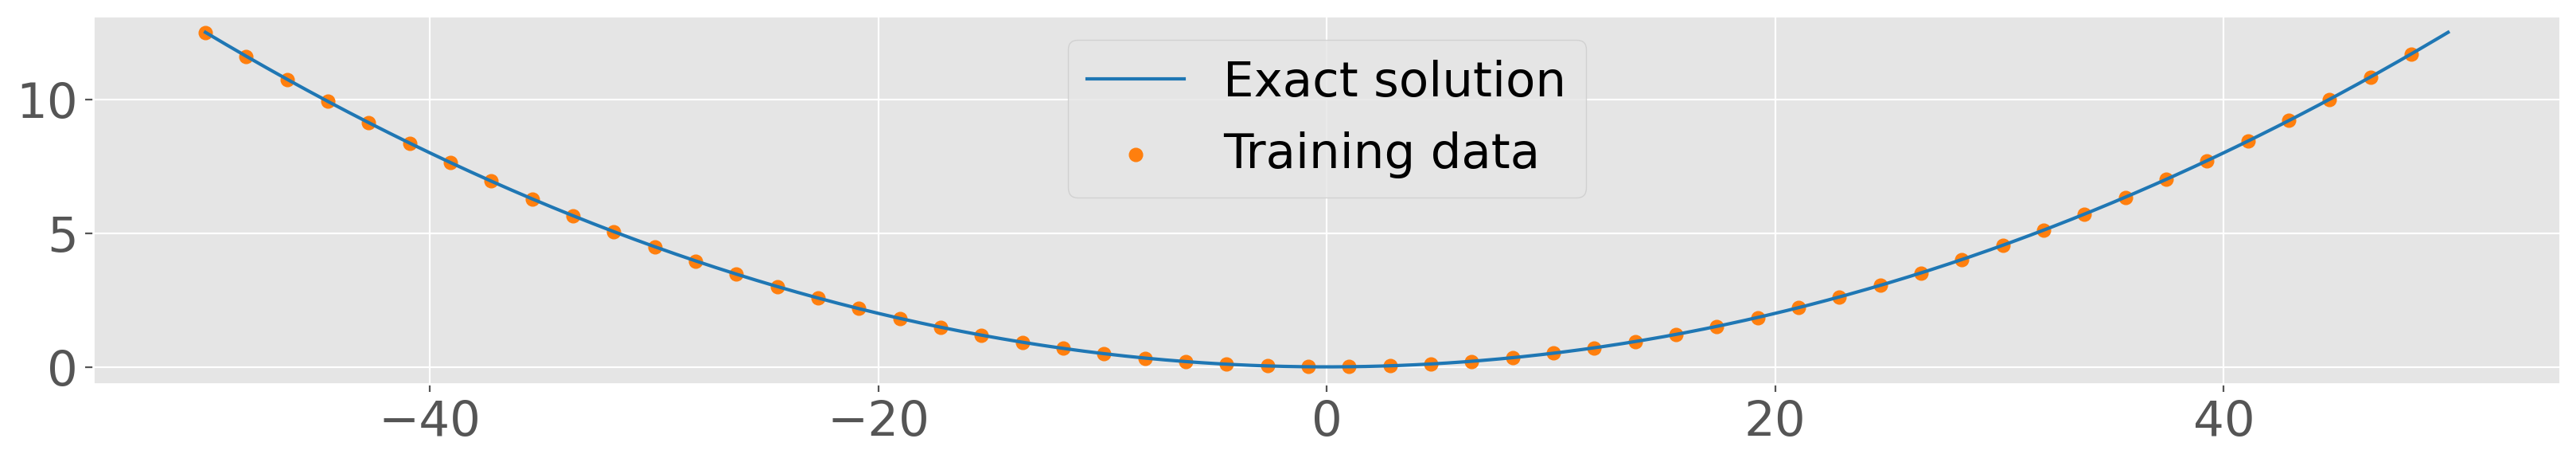

In [2]:
# Data Generation
# Timing
 
# There will be ndata data points ranging from -50 to 50
ndata = 550
x = np.linspace(-50, 50, ndata) 

# Adding noise to the random linear data
y=x**2/200 # + np.random.uniform(-4, 4, 550)#y**3/5000

n = len(x) # Number of data points

# slice out a small number of points from the LHS of the domain [ TRAIN DATA]
x_data = x[0:550:10]
y_data = y[0:550:10]
print(x_data.shape, y_data.shape) #the shapes of two NumPy arrays or tensors ,understanding the dimensions of given data

# To plot
plt.figure()
plt.plot(x, x**2/200, color="tab:blue", label="Exact solution")
# plt.scatter(x, y, color="tab:blue", label="Collected data")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.legend()
plt.show()


In [3]:
tf.random.set_seed(42)
#callbacks are useful for monitoring the model's performance visually during training
# Defining some functions to call them later
class PerformancePlotCallback(tf.keras.callbacks.Callback): #visualizing predictions against test data
    def __init__(self, x_test, y_test,x,count, model_name): #parameters x_test, y_test, x, count, and model_name as inputs.
        self.x_test = x_test
        self.y_test = y_test
        self.count = count
        self.model_name = model_name
        self.x = x
        #-----------------------------
        ## Create the directory if it doesn't exist
        self.save_dir = 'model_train_images'
        os.makedirs(self.save_dir, exist_ok=True)
        #----------------------------
        

    def on_epoch_end(self, epoch, logs={}): # end of each training epoch.
        #Visualization and Plotting
        if epoch % 10 ==0:
            self.count=self.count+1
            y_pred = self.model.predict(self.x_test)

            fig, ax = plt.subplots(figsize=(8,4))
            plt.scatter(self.x_test, y_pred, alpha=0.6,
                color='#FF0000', lw=1, ec='black')

            plt.scatter(self.x_test, self.y_test, alpha=0.1,
                color='blue', lw=1, ec='black')

            lims = [-50, 50]

            #plt.plot(lims, lims, lw=1, color='#0000FF')
            plt.plot(self.x, self.x**2/200, lw=1, color='#0000FF')
            plt.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.xlim(lims)
            plt.ylim([-5,20])
            plt.xlabel('x')
            plt.ylabel('$x^2/200$')



            plt.tight_layout()
            plt.title(f'Prediction Visualization - Epoch: {epoch}',fontsize=18)
            plt.savefig('model_train_images/'+self.model_name+"_"+str(self.count))

            # Used to return the plot as an image array
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            #Image Array for Animation

            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)
            plt.close()
            
         
         
   
            
            
            
class PerformancePlotCallbackn(tf.keras.callbacks.Callback): #visualizes predictions against an additional input
    def __init__(self, x_test, y_test,x,count, model_name):
        self.x_test = x_test
        self.y_test = y_test
        self.count = count
        self.model_name = model_name
        self.x = x

    def on_epoch_end(self, epoch, logs={}):

        if epoch % 10 ==0:
            self.count=self.count+1
            y_pred = self.model.predict(self.x)

            fig, ax = plt.subplots(figsize=(8,4))
            plt.scatter(self.x, y_pred, alpha=0.6,
                color='#FF0000', lw=1, ec='black')

            plt.scatter(self.x_test, self.y_test, alpha=0.1,
                color='blue', lw=1, ec='black')

            lims = [-50, 50]

            #plt.plot(lims, lims, lw=1, color='#0000FF')
            plt.plot(self.x, self.x**2/200, lw=1, color='#0000FF')
            plt.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.xlim(lims)
            plt.ylim([-5,20])

            plt.xlabel('x')
            plt.ylabel('$x^2/200$')

            plt.tight_layout()
            plt.title(f'Prediction Visualization  - Epoch: {epoch}',fontsize=18)
#             plt.savefig('model_train_images/'+self.model_name+"_"+str(self.count))

            # Used to return the plot as an image array
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)
            plt.close()
            
 





 #---------------------------------------------------------
#Callback for learning curve 
class LogMSECallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        mse = logs.get('loss')
        if epoch % 10 == 0:
            print(f'Epoch [{epoch+1}/500], MSE: {mse:.4f}')
            
            
# ----------------------------------------------------------             
 

1. generate data
2. buid/define model
3. compile the model
* fit the model - history 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/500
2/2 [==============================] - 1s 525ms/step - loss: 106.5568
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 43.1364
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 56.8217
Epoch 4/500
2/2 [==========

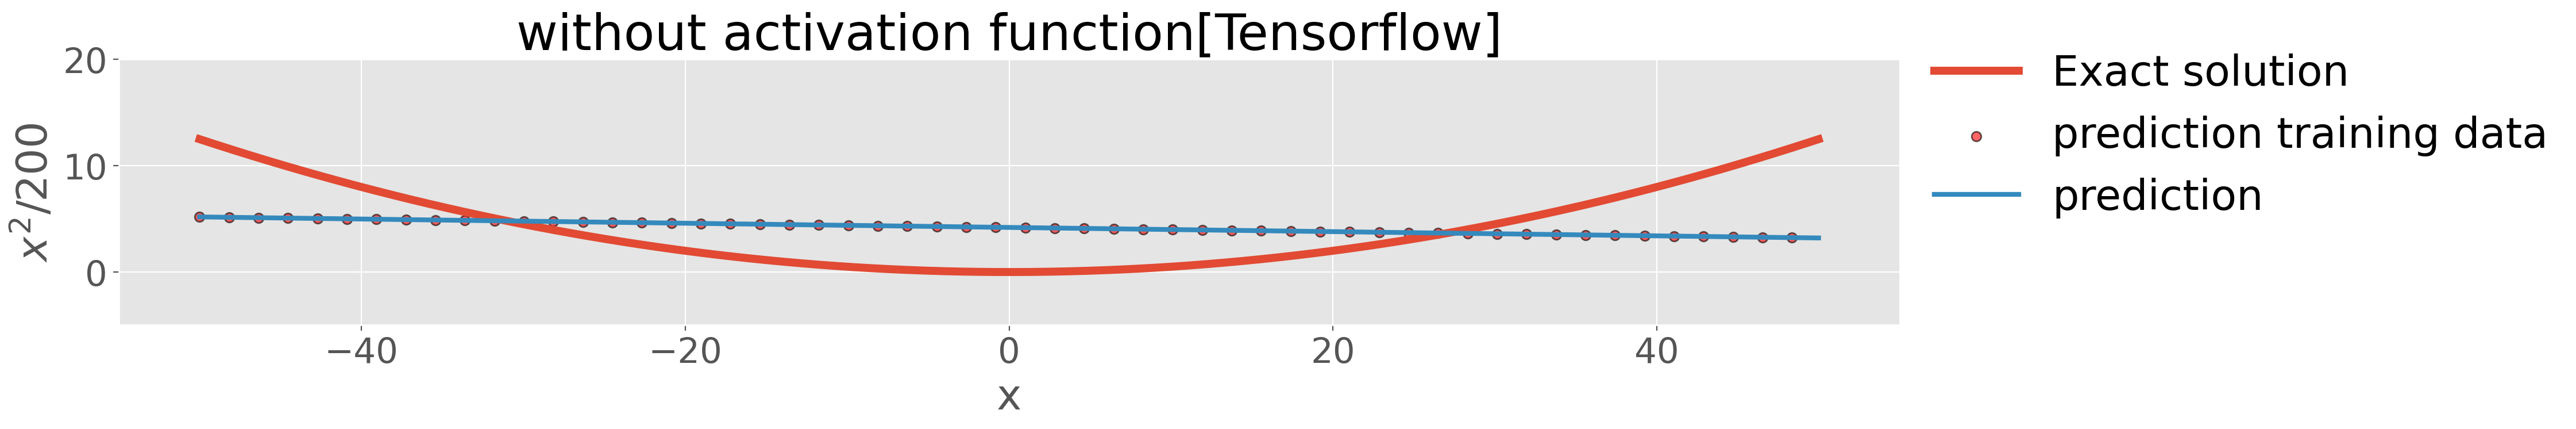

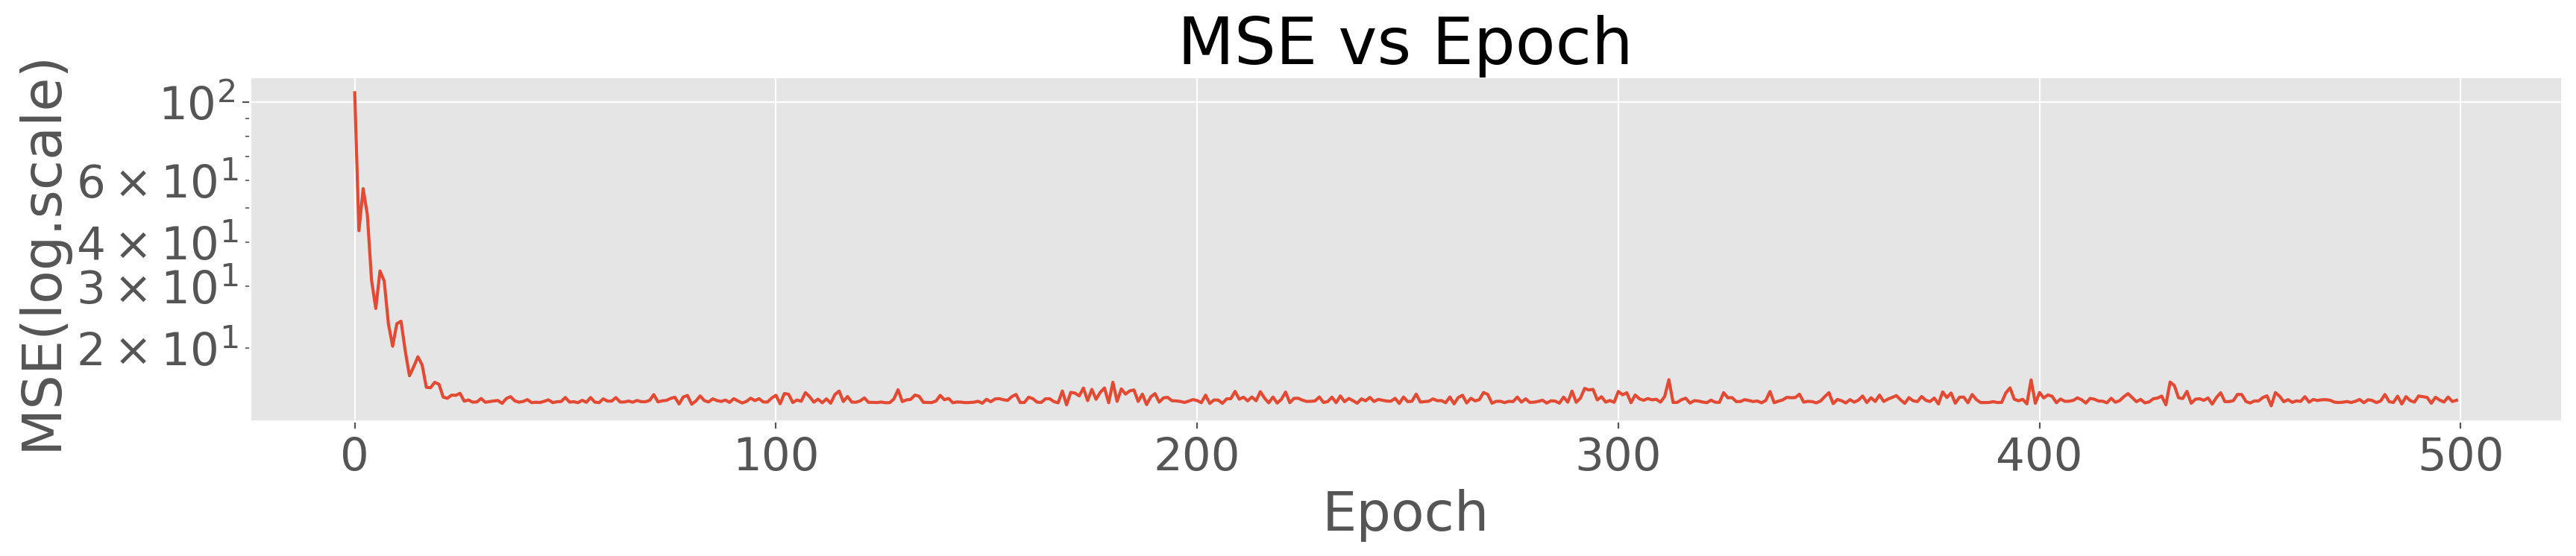

In [4]:
tf.random.set_seed(42)
###########################################
# 2.Define the model   
#[Model 1]

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(32, input_shape=[1])) # one input, 32 neurons in one hidden layer. no activation fucntion
model1.add(tf.keras.layers.Dense(1)) 
# 3. compiling the model
model1.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2)) # MSE loss, learning rate = 1e-2
model1.summary() #prints a summary of the model's architecture
plot_model(model1, 'model.png', show_shapes=True) #plot_model function to display model's architecture, save it as an image file named 'model.png'.

# callback
performance = PerformancePlotCallback(x_data, y_data,x,0, "RegressionQ")


#--------------------------------
# for Learning curve 
log_mse_callback = LogMSECallback()
#--------------------------------

# Epoch =500 
#Fit the model
history = model1.fit(x_data, y_data, epochs=500,callbacks=[performance])#"fitting" a model refers to training the model on a given datase


# save images as a gif
imageio.mimsave('./para1.gif', my_images, fps=10)

from tensorflow.keras.utils import plot_model
plot_model(model1, 'model.png', show_shapes=True)

# To plot figure
plt.figure()
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model1.predict(x_data), alpha=0.6,
                color='#FF0000', lw=1, ec='black',label="prediction training data") # TO PREDICT ON x_data

plt.plot(x, model1.predict(x), lw=3,label="prediction")        # TO PREDICT ON x
plt.ylim([-5,20]) # to set lower and upper limit of y value
plt.xlabel('x')
plt.ylabel('$x^2/200$')
l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k") 
plt.title("without activation function[Tensorflow]") 

# underfitting problem using this model as no activation function is not used, activation function introduces the non-linearity 
# to the netowk

# --------------------------------------
# Plotting the learning curve in log scale
plt.figure()
plt.semilogy(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE(log.scale)')
plt.title('MSE vs Epoch')
plt.show()
#-------------------------------------






In [5]:
import tensorflow as tf
# Check TensorFlow's default float type
float_type = tf.keras.backend.floatx()
print("TensorFlow default float type:", float_type)

TensorFlow default float type: float32


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 132)               264       
                                                                 
 dense_3 (Dense)             (None, 132)               17556     
                                                                 
 dense_4 (Dense)             (None, 132)               17556     
                                                                 
 dense_5 (Dense)             (None, 1)                 133       
                                                                 
Total params: 35509 (138.71 KB)
Trainable params: 35509 (138.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/600
2/2 [==============================] - 1s 290ms/step - loss: 208.1792
Epoch 2/600
2/2 [==============================] - 0s 10ms/step - 

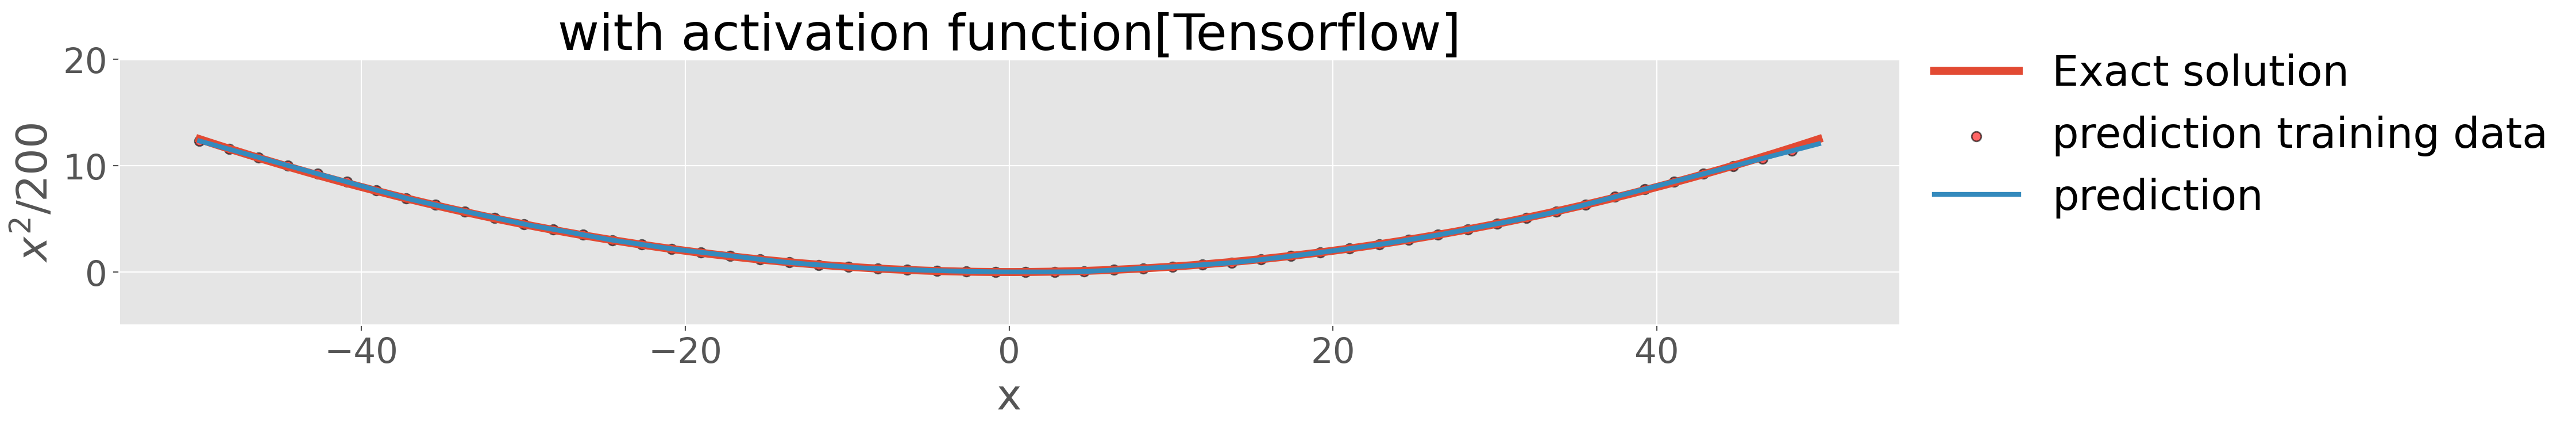

In [6]:
tf.random.set_seed(42)
# [Model 2] 
import time
start_time = time.time()  
# slice out a small number of points from the LHS of the domain [ Train data]
x_data = x[0:550:10]
y_data = y[0:550:10]

# Defining model 2
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(132, input_shape=[1]))    # two activation functions , two hidden layers , 132 neurons
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(1))
#compiling the model #model is ready to be trained, it learns from the provided data based on the specified optimizer, loss function, and metrics.
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model2.summary()
# callback
performance = PerformancePlotCallbackn(x_data, y_data,x,0, "RegressionQ")

# Epoch = 600
history = model2.fit(x_data, y_data, epochs=600,batch_size=32,callbacks=[performance])
# save images as a gif
imageio.mimsave('./para3.gif', my_images, fps=10)

# To plot
plt.figure()
x_data = x[0:550:10] #10 original
y_data = y[0:550:10] 


plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2.predict(x_data), alpha=0.6,
                color='#FF0000', lw=1, ec='black',label="prediction training data")

plt.plot(x, model2.predict(x), lw=3,label="prediction")
plt.ylim([-5,20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")
plt.title("with activation function[Tensorflow]") 
# step size of train data
# bit underfitting problem but still good prediction using this model
# the  problem of little underfitting arise when step size is 10 that time loss is higher than when step sise 
# is small 5
# higher step size - high loss
# small step size - small loss - good prediction 
# but too much small can take longer time to execure and higher step size has short execution time , so find appropriate one

# Timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds") 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 132)               264       
                                                                 
 dense_7 (Dense)             (None, 132)               17556     
                                                                 
 dense_8 (Dense)             (None, 132)               17556     
                                                                 
 dense_9 (Dense)             (None, 1)                 133       
                                                                 
Total params: 35509 (138.71 KB)
Trainable params: 35509 (138.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch [1/600], Loss: 22.1710
Epoch [2/600], Loss: 952.7200
Epoch [3/600], Loss: 59.8961
Epoch [4/600], Loss: 31.2674
Epoch [5/600], Loss: 64.9109
Ep

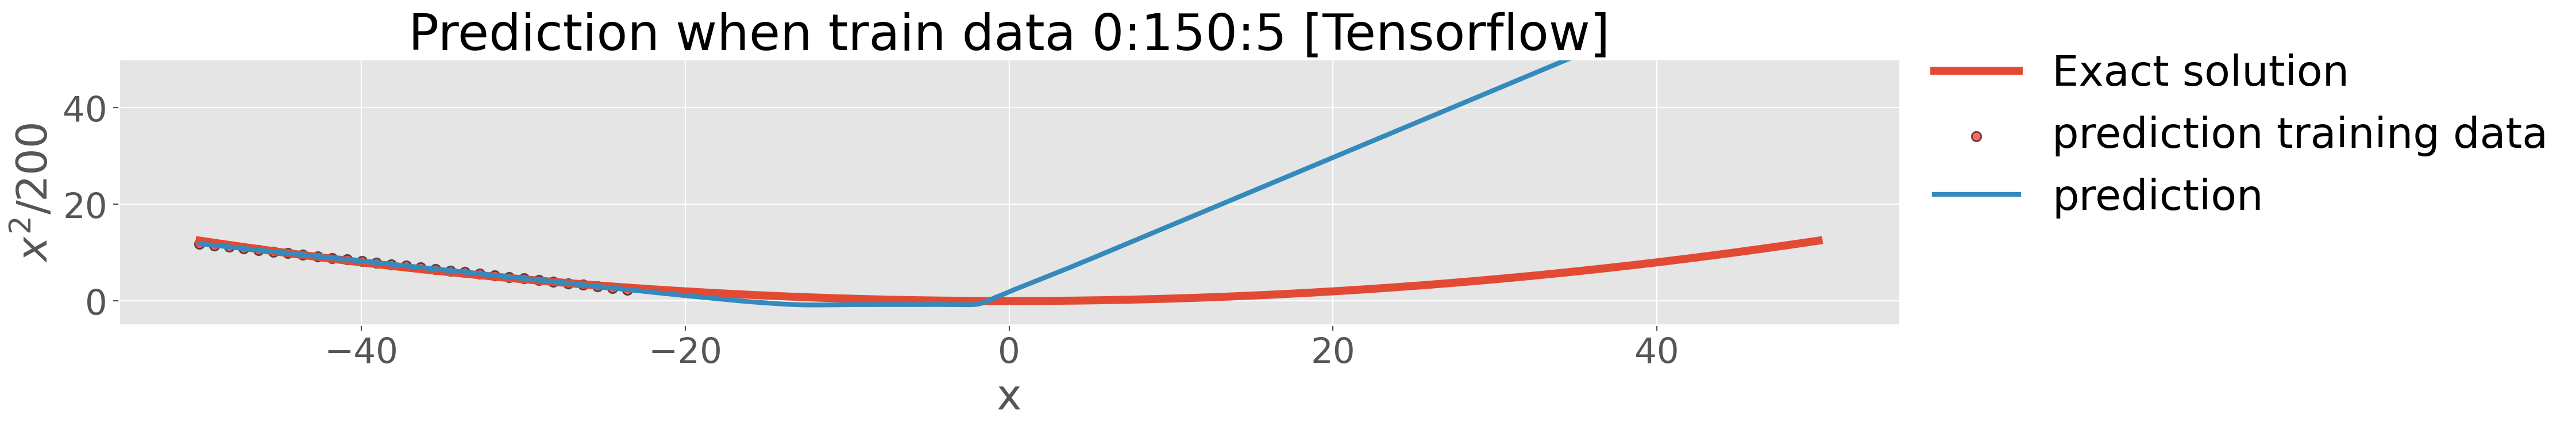

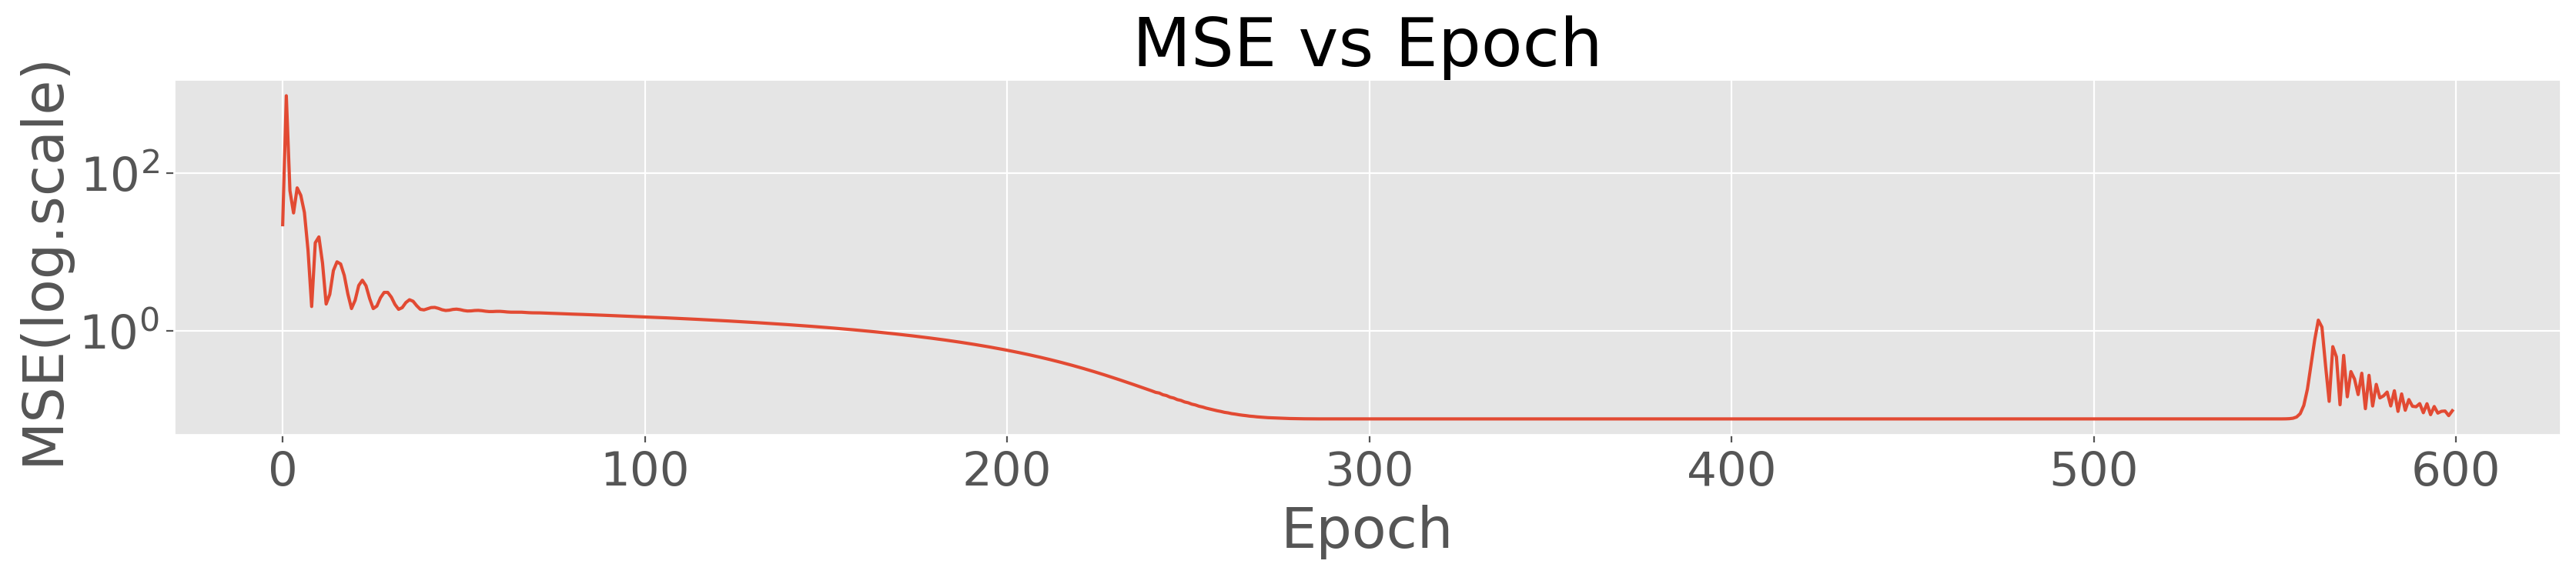

In [7]:
tf.random.set_seed(42)
# [ model 2d but same structure]

import time
start_time = time.time()  

# slice out a small number of points from the LHS of the domain [ train data]
x_data = x[0:150:5]
y_data = y[0:150:5]
# defining model
model2d = tf.keras.Sequential()
model2d.add(tf.keras.layers.Dense(132, input_shape=[1]))
model2d.add(tf.keras.layers.Dense(132,  activation='relu'))
model2d.add(tf.keras.layers.Dense(132,  activation='relu'))
model2d.add(tf.keras.layers.Dense(1))
# to compile
model2d.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model2d.summary()
# callback
performance = PerformancePlotCallbackn(x_data, y_data,x,0, "RegressionQ")


#--------------------------------
# for Learning curve 
log_mse_callback = LogMSECallback()
#--------------------------------  




# Train the model and collect loss values
loss_values_150_T = []
for epoch in range(600):
    history = model2d.fit(x_data, y_data, epochs=1, batch_size=32, verbose=0)  # Train for 1 epoch
    loss_values_150_T.append(history.history['loss'][0])
    print(f'Epoch [{epoch+1}/600], Loss: {loss_values_150_T[-1]:.4f}')  # Print loss per epoch

# Save loss values to a text file
np.savetxt('loss_per_epoch_150_T.txt', loss_values_150_T) 



# Epoch = 600 
# history = model2d.fit(x_data, y_data, epochs=600,batch_size=32,callbacks=[performance]) #original
# save images as a gif
imageio.mimsave('./para2.gif', my_images, fps=10)

# To plot figure
plt.figure()
x_data = x[0:150:5]
y_data = y[0:150:5]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2d.predict(x_data), alpha=0.6,
                color='#FF0000', lw=1, ec='black',label="prediction training data")

plt.plot(x, model2d.predict(x), lw=3,label="prediction")
plt.ylim([-5,50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.savefig('y_x2_150Tensor.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution 

plt.title("Prediction when train data 0:150:5 [Tensorflow]")  



# Timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")    

#plt.setp(l.get_texts(), color="k")

# good prediction with generalization using this model and this slice data 

# --------------------------------------
# Plotting the learning curve in log scale
plt.figure()
#plt.semilogy(history.history['loss'])
plt.semilogy(loss_values_150_T) 
plt.xlabel('Epoch')
plt.ylabel('MSE(log.scale)')
plt.title('MSE vs Epoch')
plt.savefig('y_x2_150_LC_Tensor.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution 
plt.show()
#------------------------------------- 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 132)               264       
                                                                 
 dense_11 (Dense)            (None, 132)               17556     
                                                                 
 dense_12 (Dense)            (None, 132)               17556     
                                                                 
 dense_13 (Dense)            (None, 1)                 133       
                                                                 
Total params: 35509 (138.71 KB)
Trainable params: 35509 (138.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch [1/600], Loss: 33.4220
Epoch [2/600], Loss: 4.2239
Epoch [3/600], Loss: 8.7213
Epoch [4/600], Loss: 2.5713
Epoch [5/600], Loss: 2.7219
Epoch [

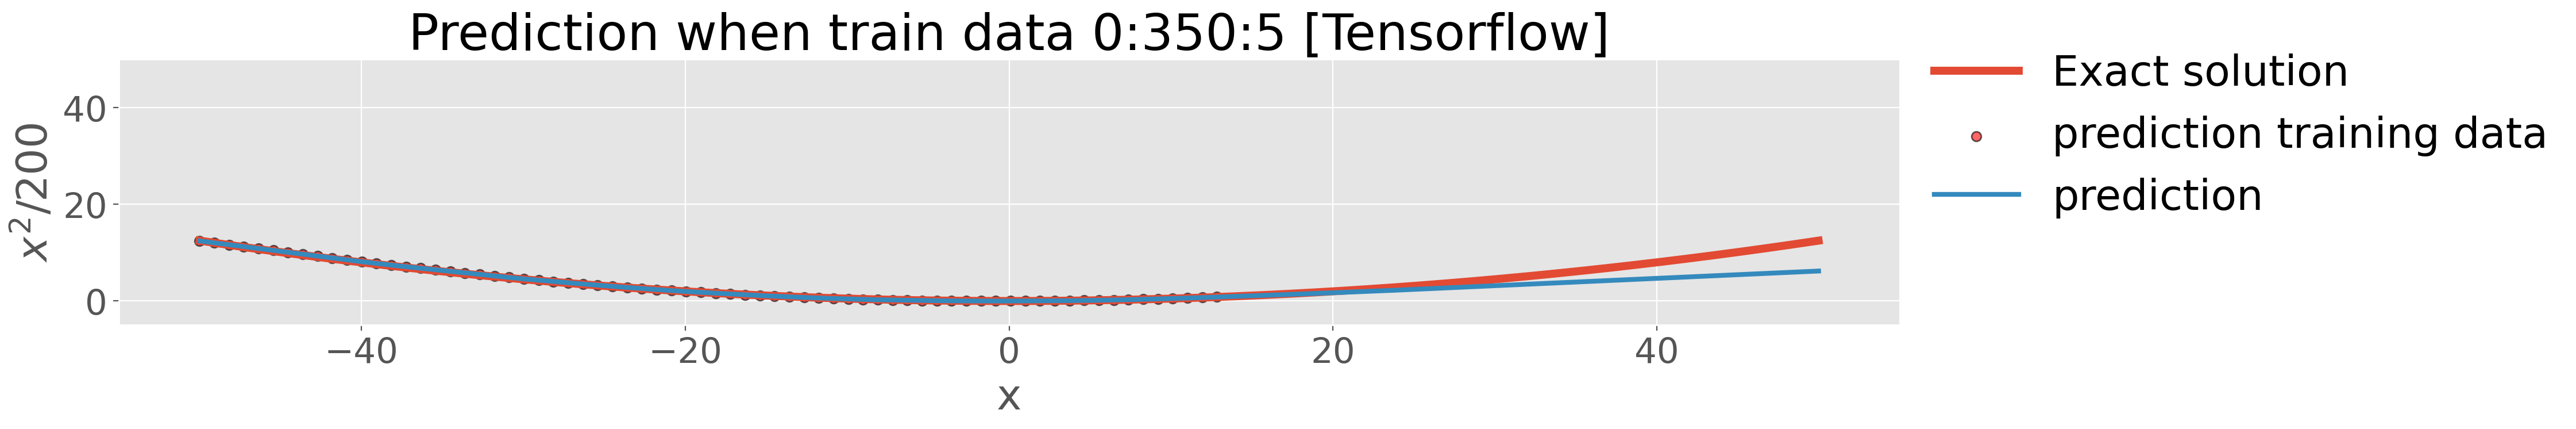

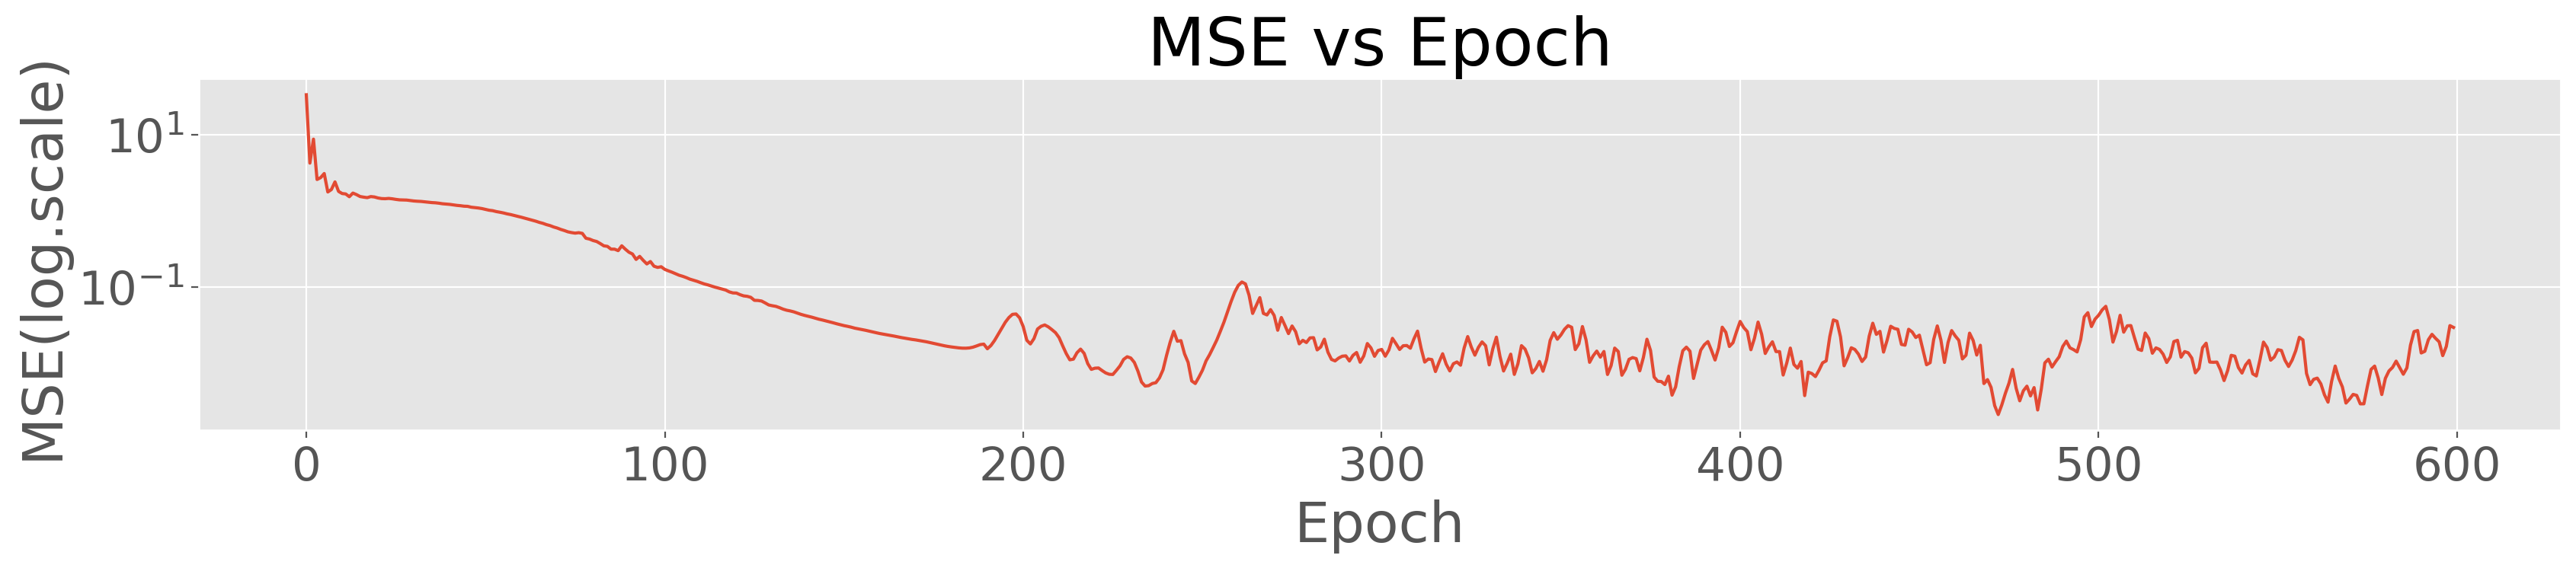

In [8]:
tf.random.set_seed(42)

import time
start_time = time.time() 

# slice out a small number of points from the LHS of the domain [train data]
x_data = x[0:350:5]
y_data = y[0:350:5]
# defining model
model2d = tf.keras.Sequential()
model2d.add(tf.keras.layers.Dense(132, input_shape=[1]))
model2d.add(tf.keras.layers.Dense(132,  activation='relu'))
model2d.add(tf.keras.layers.Dense(132,  activation='relu'))
model2d.add(tf.keras.layers.Dense(1))
# to compile
model2d.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-3))
model2d.summary()
# callback
performance = PerformancePlotCallbackn(x_data, y_data,x,0, "RegressionQ")


#--------------------------------
# for Learning curve 
log_mse_callback = LogMSECallback()
#-------------------------------- 





# Train the model and collect loss values
loss_values_350_T = []
for epoch in range(600):
    history = model2d.fit(x_data, y_data, epochs=1, batch_size=32, verbose=0)  # Train for 1 epoch
    loss_values_350_T.append(history.history['loss'][0])
    print(f'Epoch [{epoch+1}/600], Loss: {loss_values_350_T[-1]:.4f}')  # Print loss per epoch

# Save loss values to a text file
np.savetxt('loss_per_epoch_350_T.txt', loss_values_350_T) 




#history = model2d.fit(x_data, y_data, epochs=600,batch_size=32,callbacks=[performance]) #original
# save images as a gif
imageio.mimsave('./para2.gif', my_images, fps=10)

# To plot figure
plt.figure()
x_data = x[0:350:5]
y_data = y[0:350:5]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2d.predict(x_data), alpha=0.6,
                color='#FF0000', lw=1, ec='black',label="prediction training data")

plt.plot(x, model2d.predict(x), lw=3,label="prediction")
plt.ylim([-5,50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")
plt.savefig('y_x2_350_Tensor.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution 

plt.title("Prediction when train data 0:350:5 [Tensorflow]")  
# model and tuning is nice , becuase the prediction is good with good eneralization

# Timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")    

# --------------------------------------
# Plotting the learning curve in log scale
plt.figure()
#plt.semilogy(history.history['loss'])
plt.semilogy(loss_values_350_T) 
plt.xlabel('Epoch')
plt.ylabel('MSE(log.scale)')
plt.title('MSE vs Epoch') 
plt.savefig('y_x2_350_LC_Tebsor.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution 
plt.show()
#------------------------------------- 


In [9]:
#with model2, the prediction and generalization gets better with increase of training data